In [1]:
import numpy as np

a = np.nan
b = np.inf
print(a, type(a))
print(b, type(b))

nan <class 'float'>
inf <class 'float'>


In [2]:
t = np.arange(24, dtype=float).reshape(4, 6)
t[3, 4] = np.nan
print(np.count_nonzero(t))# python

23


In [ ]:
import numpy as np

# 演示特殊浮点值 np.nan（不是一个数字）和 np.inf（无穷大）
a = np.nan
b = np.inf
print(a, type(a))  # 打印 np.nan 及其类型（float）
print(b, type(b))  # 打印 np.inf 及其类型（float）

In [ ]:

# 创建一个 4x6 的浮点数组，元素为 0..23
t = np.arange(24, dtype=float).reshape(4, 6)
# 将第 4 行第 5 列的位置设置为 NaN（模拟缺失值）
t[3, 4] = np.nan
# count_nonzero 返回数组中非零元素的数量；注意 NaN 被视为非零（非等于 0）
print(np.count_nonzero(t))

In [3]:
# t != t 对 NaN 元素会返回 True（因为 NaN 不等于自身），因此统计 NaN 的一种方式
print(np.count_nonzero(t != t))
# 使用布尔索引将所有 NaN 替换为 0
t[np.isnan(t)] = 0
print(t)

1
[[ 0.  1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10. 11.]
 [12. 13. 14. 15. 16. 17.]
 [18. 19. 20. 21.  0. 23.]]


In [4]:

# ----------练习： 处理数组中 nan（按列处理缺失值）
# 重新生成一个 4x6 的浮点数组
t = np.arange(24).reshape(4, 6).astype('float')
# 将第 2 行从第 4 列到末尾的元素设为 NaN（模拟不同行中出现的缺失）
t[1, 3:] = np.nan
print(t)
print('-------------------')

[[ 0.  1.  2.  3.  4.  5.]
 [ 6.  7.  8. nan nan nan]
 [12. 13. 14. 15. 16. 17.]
 [18. 19. 20. 21. 22. 23.]]
-------------------


In [5]:

# 遍历每一列，然后判断每一列是否有 NaN，需要对每列单独处理
for i in range(t.shape[1]):  # t.shape[1] 是列数
    # 获取当前第 i 列的数据（这是一个视图，不是拷贝）
    temp_col = t[:, i]
    # 判断当前列中含有 NaN 的数量
    # 这里使用 temp_col != temp_col 来检测 NaN（因为 NaN != NaN 为 True）
    nan_num = np.count_nonzero(temp_col != temp_col)
    if nan_num != 0:
        # 将这一列中不是 NaN 的值取出来（作为计算平均值的样本）
        # 通过 temp_col == temp_col 来得到非 NaN 的布尔索引
        temp_col_not_nan = temp_col[temp_col == temp_col]
        # 计算该列非 NaN 元素的均值
        col_mean = np.mean(temp_col_not_nan)
        # 将该列中为 NaN 的位置赋值为该列的均值
        # np.isnan(temp_col) 返回一个布尔数组，指示哪些位置是 NaN
        temp_col[np.isnan(temp_col)] = col_mean
        # 注意：因为 temp_col 是 t 的列视图，上面的赋值会修改原数组 t

# 循环结束后打印处理后的数组，所有列的 NaN 都被替换为该列的均值
print(t)
print(np.count_nonzero(t != t))
t[np.isnan(t)] = 0
print(t)

[[ 0.  1.  2.  3.  4.  5.]
 [ 6.  7.  8. 13. 14. 15.]
 [12. 13. 14. 15. 16. 17.]
 [18. 19. 20. 21. 22. 23.]]
0
[[ 0.  1.  2.  3.  4.  5.]
 [ 6.  7.  8. 13. 14. 15.]
 [12. 13. 14. 15. 16. 17.]
 [18. 19. 20. 21. 22. 23.]]


In [ ]:

# ----------练习： 处理数组中 nan
t = np.arange(24).reshape(4, 6).astype('float')
t[1, 3:] = np.nan
print(t)
print('-------------------')

# 遍历每一列，然后判断每一列是否有 nan
for i in range(t.shape[1]):
    # 获取当前列数据
    temp_col = t[:, i]
    # 判断当前列的数据中是否含有 nan
    nan_num = np.count_nonzero(temp_col != temp_col)
    if nan_num != 0:
        # 将这一列不为 nan 的数据拿出来
        temp_col_not_nan = temp_col[temp_col == temp_col]
        # 将 nan 替换成这一列的平均值
        temp_col[np.isnan(temp_col)] = np.mean(temp_col_not_nan)

print(t)

In [6]:
#对换数组的维度
import numpy as np
a = np.arange(12).reshape(3,4)
print ('原数组：')
print (a )
print ('\n')

原数组：
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]




In [7]:
print ('对换数组：')
print (np.transpose(a))

对换数组：
[[ 0  4  8]
 [ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]]


In [8]:
# 与 transpose 一致
a = np.arange(12).reshape(3,4)
print ('原数组：')
print (a)
print ('\n')
print ('转置数组：')
print (a.T)

原数组：
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


转置数组：
[[ 0  4  8]
 [ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]]


In [9]:
# 函数用于交换数组的两个轴
t1 = np.arange(24).reshape(4,6)
re = t1.swapaxes(1,0)
print (' 原 数 组 ：')
print (t1)
print ('\n')
print ('调用 swapaxes 函数后的数组：')
print (re)

 原 数 组 ：
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]


调用 swapaxes 函数后的数组：
[[ 0  6 12 18]
 [ 1  7 13 19]
 [ 2  8 14 20]
 [ 3  9 15 21]
 [ 4 10 16 22]
 [ 5 11 17 23]]


In [11]:
import numpy as np

# 1. 造房子：2栋楼，3层高，每层4个房间
# 先生成全是0的数字
t = np.zeros((2, 3, 4))

# 2. 把“老张(999)”安顿进去
# 老张住在：第0栋，第1层，第3号房
t[0, 1, 3] = 999

print("【一开始】老张的地址是：(0, 1, 3)")
print("数据的样子是：2栋，3层，4房")
print("-" * 30)

# ---------------------------
# 演示：轴交换 (Swap) - 0和2互换
# ---------------------------
t_swap = t.swapaxes(0, 2)

# 咱们看看老张去哪了？
# 因为0和2互换，老张的地址从 (0, 1, 3) 变成了 (3, 1, 0)
# 我们去新地址找找看
is_laozhang_here = t_swap[3, 1, 0]

print("【轴交换后】")
print(f"原本的栋数变成了房间数，现在的形状是：{t_swap.shape}")
print(f"我们在新地址 (3, 1, 0) 找到了老张吗？ -> {is_laozhang_here}")
print("(看！老张真的被强行搬家到了第3栋楼！)")
print("-" * 30)

# ---------------------------
# 演示：轴移动 (Move) - 把轴2(房间)移到最前面
# ---------------------------
# 原顺序：(栋, 层, 房) -> 新顺序：(房, 栋, 层)
t_move = np.moveaxis(t, 2, 0)

# 咱们按新规矩找老张
# 原地址 (0, 1, 3) -> 新地址 (3, 0, 1)
is_laozhang_here_2 = t_move[3, 0, 1]

print("【轴移动后】")
print(f"只是把房间号提到了最前面，现在的形状是：{t_move.shape}")
print(f"我们在重排后的地址 (3, 0, 1) 找到了老张吗？ -> {is_laozhang_here_2}")

【一开始】老张的地址是：(0, 1, 3)
数据的样子是：2栋，3层，4房
------------------------------
【轴交换后】
原本的栋数变成了房间数，现在的形状是：(4, 3, 2)
我们在新地址 (3, 1, 0) 找到了老张吗？ -> 999.0
(看！老张真的被强行搬家到了第3栋楼！)
------------------------------
【轴移动后】
只是把房间号提到了最前面，现在的形状是：(4, 2, 3)
我们在重排后的地址 (3, 0, 1) 找到了老张吗？ -> 999.0


In [12]:
import numpy as np
us_file_path = "./youtube_video_data/US_video_data_numbers.csv"
uk_file_path = "./youtube_video_data/GB_video_data_numbers.csv"
t1 = np.loadtxt(us_file_path,delimiter=",",dtype="int",unpack=True)
t2 = np.loadtxt(us_file_path,delimiter=",",dtype="int")
print(t1)
print("*"*100)
print(t2)
print("*"*100)

[[4394029 7860119 5845909 ...  142463 2162240  515000]
 [ 320053  185853  576597 ...    4231   41032   34727]
 [   5931   26679   39774 ...     148    1384     195]
 [  46245       0  170708 ...     279    4737    4722]]
****************************************************************************************************
[[4394029  320053    5931   46245]
 [7860119  185853   26679       0]
 [5845909  576597   39774  170708]
 ...
 [ 142463    4231     148     279]
 [2162240   41032    1384    4737]
 [ 515000   34727     195    4722]]
****************************************************************************************************


In [13]:
# 取行
print(t2[2])
print("*"*100)

[5845909  576597   39774  170708]
****************************************************************************************************


In [14]:
#取连续的多行
# print(t2[2:])
# print("*"*100)

[[5845909  576597   39774  170708]
 [2642103   24975    4542   12829]
 [1168130   96666     568    6666]
 ...
 [ 142463    4231     148     279]
 [2162240   41032    1384    4737]
 [ 515000   34727     195    4722]]
****************************************************************************************************


In [15]:
#取不连续的多行
print(t2[[2,8,10]])
print(t2[1,:])
print("*"*100)
print(t2[2:,:])
print("*"*100)
print(t2[[2,10,3],:])
print(t2[:,0])

[[5845909  576597   39774  170708]
 [1338533   69687     678    5643]
 [ 859289   34485     726    1914]]
[7860119  185853   26679       0]
****************************************************************************************************
[[5845909  576597   39774  170708]
 [2642103   24975    4542   12829]
 [1168130   96666     568    6666]
 ...
 [ 142463    4231     148     279]
 [2162240   41032    1384    4737]
 [ 515000   34727     195    4722]]
****************************************************************************************************
[[5845909  576597   39774  170708]
 [ 859289   34485     726    1914]
 [2642103   24975    4542   12829]]
[4394029 7860119 5845909 ...  142463 2162240  515000]


In [16]:
#取连续的多列
print(t2[:,2:])

[[  5931  46245]
 [ 26679      0]
 [ 39774 170708]
 ...
 [   148    279]
 [  1384   4737]
 [   195   4722]]


In [ ]:
#取不连续的多列
# print(t2[:,[0,2]])

In [17]:
#去行和列，取第 3 行，第四列的值
a = t2[2,3]
print(a)
print(type(a))

170708
<class 'numpy.int64'>


In [ ]:
#取多行和多列，取第 3 行到第五行，第 2 列到第 4 列的结果
#去的是行和列交叉点的位置
b = t2[2:5,1:4]
print(b)
print("*"*100)
#取多个不相邻的点
#选出来的结果是（0，0） （2，1） （2，3）
c = t2[[0,2,2],[0,1,3]]
print(c)

582624 0


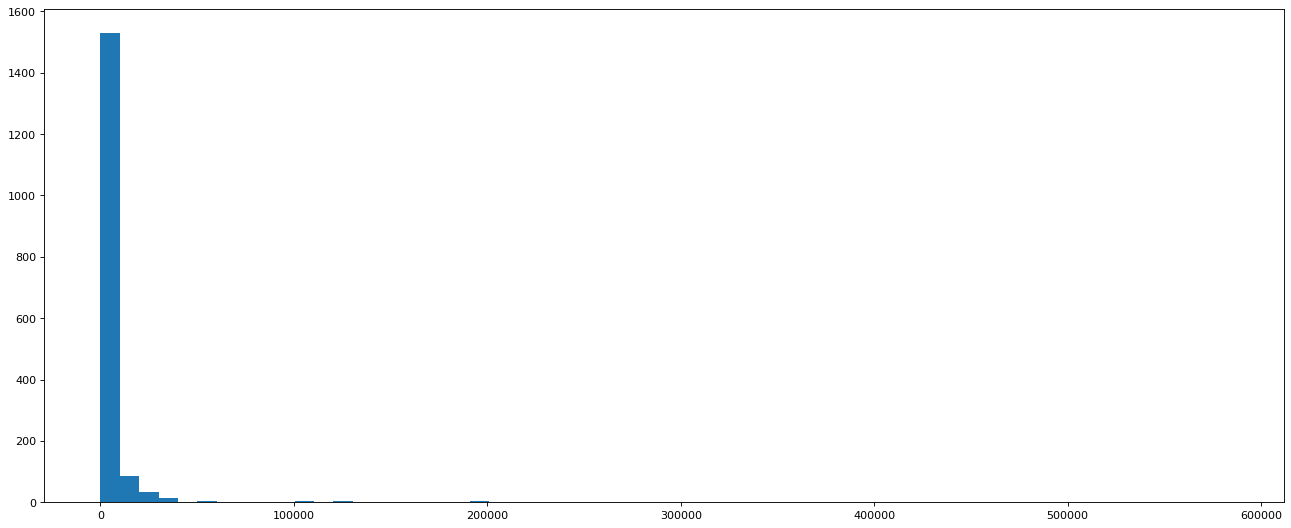

In [18]:
import numpy as np
from matplotlib import pyplot as plt
us_file_path = "./youtube_video_data/US_video_data_numbers.csv"
uk_file_path = "./youtube_video_data/GB_video_data_numbers.csv"
# t1 = np.loadtxt(us_file_path,delimiter=",",dtype="int",unpack=True)
t_us = np.loadtxt(us_file_path,delimiter=",",dtype="int")
# 取评论的数据
t_us_comments = t_us[:,-1]
# 怎么知道分多少，打印最大和最小值
print(t_us_comments.max(),t_us_comments.min())
d = 10000
bin_nums = (t_us_comments.max()-t_us_comments.min())//d
# 绘图
plt.figure(figsize=(20,8),dpi=80)
plt.hist(t_us_comments,bin_nums)
plt.show()

4995 0


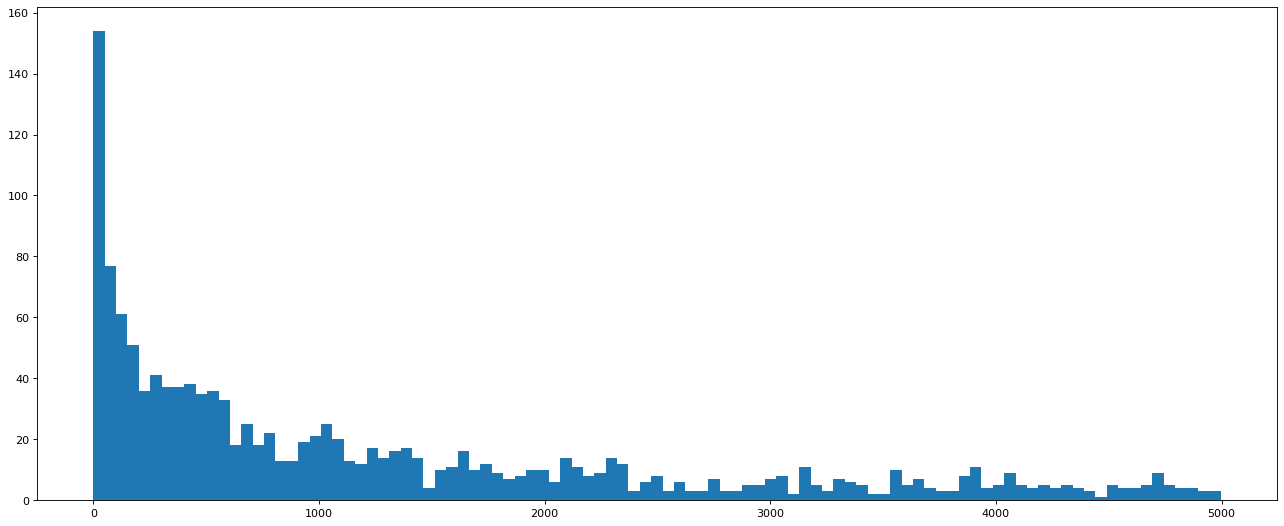

In [19]:
import numpy as np
from matplotlib import pyplot as plt
us_file_path = "./youtube_video_data/US_video_data_numbers.csv"
uk_file_path = "./youtube_video_data/GB_video_data_numbers.csv"
# t1 = np.loadtxt(us_file_path,delimiter=",",dtype="int",unpack=True)
t_us = np.loadtxt(us_file_path,delimiter=",",dtype="int")
#取评论的数据
t_us_comments = t_us[:,-1]
#选择比 5000 小的数据
t_us_comments = t_us_comments[t_us_comments<=5000]
print(t_us_comments.max(),t_us_comments.min())
d = 50
bin_nums = (t_us_comments.max()-t_us_comments.min())//d
#绘图
plt.figure(figsize=(20,8),dpi=80)
plt.hist(t_us_comments,bin_nums)
plt.show()

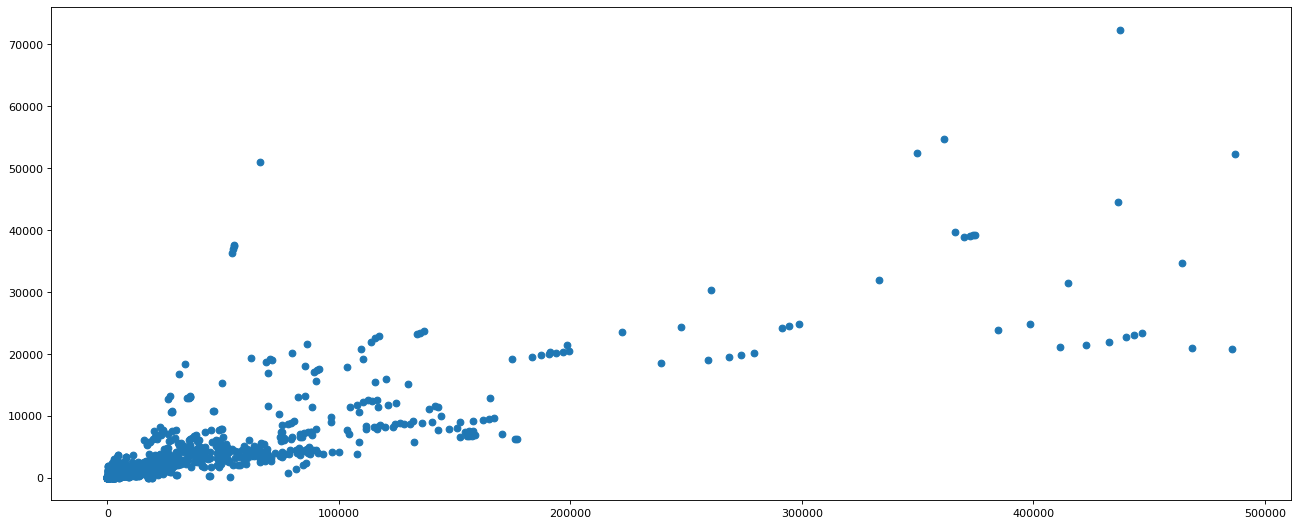

In [21]:
import numpy as np
from matplotlib import pyplot as plt
us_file_path = "./youtube_video_data/US_video_data_numbers.csv"
uk_file_path = "./youtube_video_data/GB_video_data_numbers.csv"
# t1 = np.loadtxt(us_file_path,delimiter=",",dtype="int",unpack=True)
t_uk = np.loadtxt(uk_file_path,delimiter=",",dtype="int")
#选择喜欢数比 50 万小的数据
t_uk = t_uk[t_uk[:,1]<=500000]
t_uk_comment = t_uk[:,-1]
t_uk_like = t_uk[:,1]
plt.figure(figsize=(20,8),dpi=80)
plt.scatter(t_uk_like,t_uk_comment)
plt.show()